<a href="https://colab.research.google.com/github/hukitoc94/DLS/blob/master/Hukitoc_simpsons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Если честно в исходном ноутбуке "каша" с установкой библиотек, поэтому я хочу переписать все с нуля и комментировать код уже тут 

In [1]:
import PIL
PIL.__version__

'5.3.0'

In [5]:
# устанавливаем пил 5.3.0 и перезапускаем ноут бук
!pip uninstall -y Pillow
!pip install -Iv Pillow==5.3.0

Found existing installation: Pillow 7.1.2
Uninstalling Pillow-7.1.2:
  Successfully uninstalled Pillow-7.1.2
Using pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)
Value for scheme.platlib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.purelib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.headers does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/include/python3.7/UNKNOWN
sysconfig: /usr/include/python3.7m/UNKNOWN
Value for scheme.scripts does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/bin
sysconfig: /usr/bin
Value for scheme.data does not match. Please report this to <https:/

In [2]:
!pip install -U torch torchvision
!pip install -q 'https://download.pytorch.org/whl/cu101/torch-1.5.0%2Bcu101-cp36-cp36m-linux_x86_64.whl' torchvision
import torch
!nvidia-smi
torch.cuda.is_available()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |██████████████████████████████  | 834.1 MB 1.2 MB/s eta 0:00:48tcmalloc: large alloc 1147494400 bytes == 0x64a0a000 @  0x7f5ca25e4615 0x58ead6 0x4f355e 0x4d222f 0x51041f 0x5b4ee6 0x58ff2e 0x510325 0x5b4ee6 0x58ff2e 0x50d482 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4bac0a 0x538a76 0x590ae5 0x510280 0x5b4ee6 0x58ff2e 0x50d482 0x5b4ee6 0x58ff2e 0x50c4fc 0x58fd37 0x50ca37 0x5b4ee6 0x58ff2e
     |████████████████████████████████| 890.2 MB 8.0 kB/s 
     |████████████████████████████████| 24.3 MB 1.3 MB/s 
     |████████████████████████████████| 317.1 MB 35 kB/s 
     |████████████████████████████████| 849 kB 66.6 MB/s 
     |████████████████████████████████| 21.0 MB 1.2 MB/s 
     |████████████████████████████████| 557.1 MB 13 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1+cu113
    Uninstalling torch-1.12.1+cu113:
      Successfully unin

False

In [1]:
import torch
!nvidia-smi
torch.cuda.is_available()

Wed Nov 16 12:49:08 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

True

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')
!unzip -q /content/gdrive/My\ Drive/journey-springfield.zip
!ls train


Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
replace characters_illustration.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [64]:
import pickle
import numpy as np
import pandas as pd
from skimage import io
import math
import random

from tqdm import tqdm, tqdm_notebook
from PIL import Image
from pathlib import Path

from torchvision import transforms
from torchvision.utils import save_image

from multiprocessing.pool import ThreadPool
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

from matplotlib import colors, pyplot as plt
%matplotlib inline

# в sklearn не все гладко, чтобы в colab удобно выводить картинки 
# мы будем игнорировать warnings
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

все очень хорошо, но в начале я хочу посмотреть на данные 

In [6]:
train_dir = Path('train/simpsons_dataset')
train_val_files = sorted(list(train_dir.rglob('*.jpg')))

train_val_labels = [path.parent.name for path in train_val_files]


In [54]:
df = pd.DataFrame({"labels" : train_val_labels}).value_counts().rename_axis('unique_values').to_frame('counts')
df = df.reset_index().set_index('unique_values')

In [55]:
df

,counts
unique_values,
homer_simpson,2246
ned_flanders,1454
moe_szyslak,1452
lisa_simpson,1354
bart_simpson,1342
marge_simpson,1291
krusty_the_clown,1206
principal_skinner,1194
charles_montgomery_burns,1193


довольно очевиден дисбаланс гомеров 2200 а лионеля хатца 3, поскольку колаб имеет какие то ограничения по объему данных,аугаментациями остальные классы до 2250 (способ я посмотрел в одном из ноутбуков на кагле, но это правилами не запрещено)

In [56]:
df['to_add'] = df['counts'].apply(lambda x: 2250 - x if x < 2250 else 0)
df['one_iteration'] = df.apply(lambda x: math.ceil(x['to_add'] / x['counts']), axis=1)
df
# to_add - сколько добавить до 2250 , one_iteration - сколько раз пройтись циклом по данным

,counts,to_add,one_iteration
unique_values,,,
homer_simpson,2246,4,1
ned_flanders,1454,796,1
moe_szyslak,1452,798,1
lisa_simpson,1354,896,1
bart_simpson,1342,908,1
marge_simpson,1291,959,1
krusty_the_clown,1206,1044,1
principal_skinner,1194,1056,1
charles_montgomery_burns,1193,1057,1


In [57]:
augmenters = {
    'Crop': transforms.Compose([
                                transforms.Resize(size=300, max_size=301),
                                transforms.CenterCrop(size=300),
                                transforms.RandomCrop(250)
                                ]),
    'Rotate': transforms.RandomRotation(degrees=(-45, 45)),
    'HFlip': transforms.RandomHorizontalFlip(p=1)
}

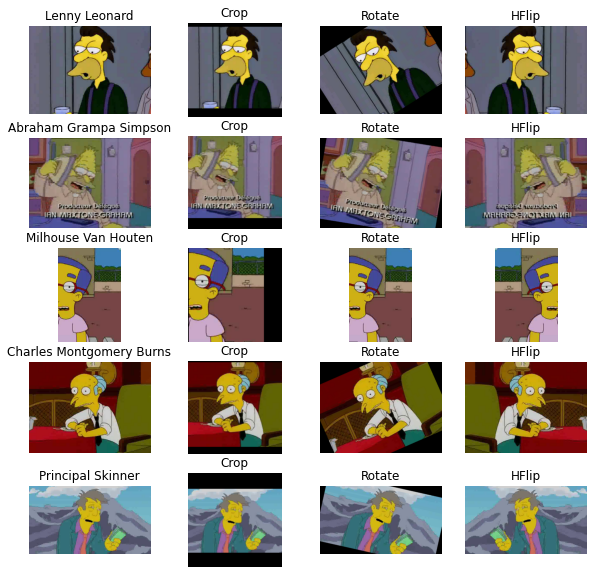

In [58]:
n_examples = 5

fig, ax = plt.subplots(nrows=n_examples, ncols=(len(augmenters) + 1),figsize=(10, 10))

for i in range(n_examples):
    random_character = int(np.random.uniform(0, len(train_val_files)))
    img_path = train_val_files[random_character]


    img_orig = Image.open(img_path)
    img_orig.load()

    img_label = train_val_files[random_character].parent.name

    img_label = " ".join(map(lambda x: x.capitalize(),\
                img_label.split('_')))
    ax[i][0].imshow(img_orig)
    ax[i][0].set_title(img_label)
    ax[i][0].axis('off')
        
    for j, (augmenter_name, augmenter) in enumerate(augmenters.items()):
        img_aug = augmenter(img_orig)
        ax[i][j + 1].imshow(img_aug)
        ax[i][j + 1].set_title(augmenter_name)
        ax[i][j + 1].axis('off')


Далее циклы для того чтобы пробегаться и увеличивать выборку 



In [65]:

for image_path in tqdm(train_val_files):
    path = image_path.parents[0]
    character = image_path.parent.name


    img = Image.open(img_path)
    img.load()
    # if we don't need to add any images, we can continue without transformation
    if df.loc[character]['to_add'] <= 0:
        continue
    if df.loc[character]['one_iteration'] > df.loc[character]['to_add']:
        iter_size = df.loc[character]['to_add']
    else:
        iter_size = df.loc[character]['one_iteration']
    df.loc[character]['to_add'] -= iter_size
    for i in range(iter_size):
        augmenter = random.choice(list(augmenters.values()))
        aug_img = augmenter(img)
        aug_img.save(f"{path}/{image_path.name.split('.')[0]}_{i}.jpg")

100%|██████████| 20933/20933 [07:22<00:00, 47.31it/s]


In [101]:
train_dir = Path('train/simpsons_dataset')
train_val_files = sorted(list(train_dir.rglob('*.jpg')))

train_val_labels = [path.parent.name for path in train_val_files]

df = pd.DataFrame({"labels" : train_val_labels}).value_counts().rename_axis('unique_values').to_frame('counts')
df = df.reset_index().set_index('unique_values')

df

,counts
unique_values,
maggie_simpson,2250
patty_bouvier,2250
martin_prince,2250
mayor_quimby,2250
milhouse_van_houten,2250
miss_hoover,2250
moe_szyslak,2250
ned_flanders,2250
nelson_muntz,2250


теперь можно исполнить все то что мы исполняли в учебном ноутбуке 

In [104]:
# разные режимы датасета 
DATA_MODES = ['train', 'val', 'test']
# все изображения будут масштабированы к размеру 224x224 px
RESCALE_SIZE = 224
# работаем на видеокарте
DEVICE = torch.device("cuda")

In [105]:
class SimpsonsDataset(Dataset):
    """
    Датасет с картинками, который паралельно подгружает их из папок
    производит скалирование и превращение в торчевые тензоры
    """
    def __init__(self, files, mode):
        super().__init__()
        # список файлов для загрузки
        self.files = sorted(files)
        # режим работы
        self.mode = mode

        if self.mode not in DATA_MODES:
            print(f"{self.mode} is not correct; correct modes: {DATA_MODES}")
            raise NameError

        self.len_ = len(self.files)
     
        self.label_encoder = LabelEncoder()

        if self.mode != 'test':
            self.labels = [path.parent.name for path in self.files]
            self.label_encoder.fit(self.labels)

            with open('label_encoder.pkl', 'wb') as le_dump_file:
                  pickle.dump(self.label_encoder, le_dump_file)
                      
    def __len__(self):
        return self.len_
      
    def load_sample(self, file):
        image = Image.open(file)
        image.load()
        return image
  
    def __getitem__(self, index):
        # для преобразования изображений в тензоры PyTorch и нормализации входа
        transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 
        ])
        x = self.load_sample(self.files[index])
        x = self._prepare_sample(x)
        x = np.array(x / 255, dtype='float32')
        x = transform(x)
        if self.mode == 'test':
            return x
        else:
            label = self.labels[index]
            label_id = self.label_encoder.transform([label])
            y = label_id.item()
            return x, y
        
    def _prepare_sample(self, image):
        image = image.resize((RESCALE_SIZE, RESCALE_SIZE))
        return np.array(image)

In [106]:
def imshow(inp, title=None, plt_ax=plt, default=False):
    """Imshow для тензоров"""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt_ax.imshow(inp)
    if title is not None:
        plt_ax.set_title(title)
    plt_ax.grid(False)

In [107]:
TRAIN_DIR = Path('train/simpsons_dataset')
TEST_DIR = Path('testset/testset')

train_val_files = sorted(list(TRAIN_DIR.rglob('*.jpg')))
test_files = sorted(list(TEST_DIR.rglob('*.jpg')))

In [108]:
from sklearn.model_selection import train_test_split

train_val_labels = [path.parent.name for path in train_val_files]
train_files, val_files = train_test_split(train_val_files, test_size=0.25, \
                                          stratify=train_val_labels)

In [109]:
val_dataset = SimpsonsDataset(val_files, mode='val')

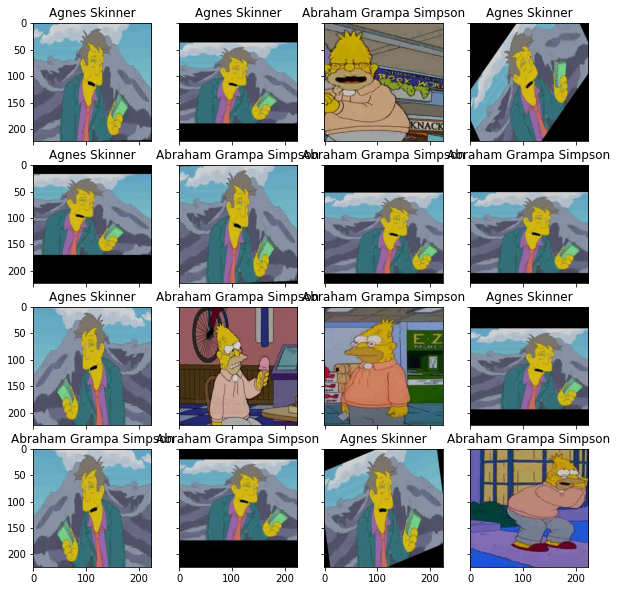

In [112]:
fig, ax = plt.subplots(nrows=4, ncols=4,figsize=(10, 10), \
                        sharey=True, sharex=True)
for fig_x in ax.flatten():
    random_characters = int(np.random.uniform(0,1000))
    im_val, label = val_dataset[random_characters]
    img_label = " ".join(map(lambda x: x.capitalize(),\
                val_dataset.label_encoder.inverse_transform([label])[0].split('_')))
    imshow(im_val.data.cpu(), \
          title=img_label,plt_ax=fig_x)